In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_file = 'data/iristrain.csv'
test_file = 'data/iristest.csv'

k = int(input())

5


In [3]:
df_train = pd.read_csv(train_file, index_col=0)
df_test = pd.read_csv(test_file, index_col=0)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  100 non-null    float64
 1   Sepal.Width   100 non-null    float64
 2   Petal.Length  100 non-null    float64
 3   Petal.Width   100 non-null    float64
 4   Species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 4 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  50 non-null     float64
 1   Sepal.Width   50 non-null     float64
 2   Petal.Length  50 non-null     float64
 3   Petal.Width   50 non-null     float64
 4   Species       50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [6]:
df_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
nr,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


<Figure size 432x288 with 0 Axes>

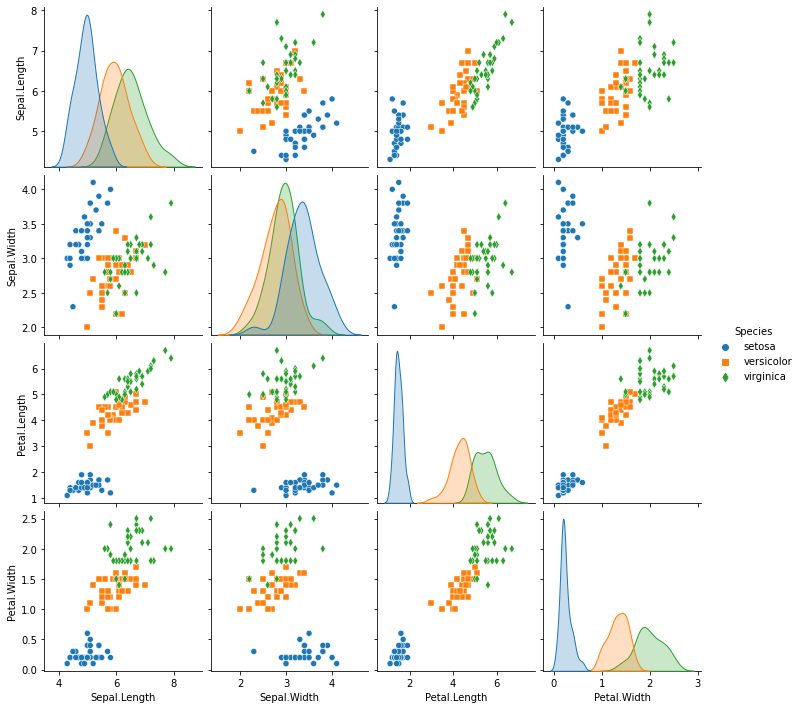

In [7]:
plt.figure()
sns.pairplot(df_train, hue="Species", markers=["o","s","d"])
plt.show()

In [8]:
train_array = df_train.to_numpy()
test_array = df_test.to_numpy()

In [9]:
def calculate_euclidean_distance(x1, x2):
    distance = 0
    for i in range(len(x1) - 1):
        distance += (x1[i] - x2[i])**2
    return sqrt(distance)

In [10]:
def get_nearest_neighbors(train_array, test_row, k):
    distances = []
    data = []
    for train_row in train_array:
        distance = calculate_euclidean_distance(test_row, train_row)
        distances.append(distance)
        data.append(train_row)
    
    distances = np.array(distances)    
    data = np.array(data)
    distances_indices_sorted = distances.argsort()
    data = data[distances_indices_sorted]
    neighbors = data[:k]

    return neighbors

In [11]:
def predict_classification(train_array, test_row, k):
    neighbors = get_nearest_neighbors(train_array, test_row, k)
    output_values = [row[-1] for row in neighbors]
    prediction = max(output_values, key=output_values.count)
    return prediction

In [12]:
def get_correct_predictions(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct

In [13]:
def get_test_set_predictions(k):
    actual = test_array[:, -1]
    predicted = []

    for test_row in test_array:
        prediction = predict_classification(train_array, test_row, k)
        predicted = np.append(predicted, prediction)
    
    correct = get_correct_predictions(actual, predicted)
    accuracy = correct / len(actual)
    return correct, accuracy
    
def evaluate_model(k):
    correct, accuracy = get_test_set_predictions(k)
    print('Correct predictions: %d' % correct)
    print('Accuracy: {:.1%}'.format(accuracy))
 

In [14]:
evaluate_model(k)

Correct predictions: 48
Accuracy: 96.0%


In [15]:
def get_user_input():
    print('Enter vector values: ')
    vector = []
    size = test_array[0].size - 1
    for i in range(size):
        vector.append(float(input('Value: ')))
    vector = np.array(vector)
    return vector

In [16]:
def predict_user_input():
    prediction = predict_classification(train_array, get_user_input(), 3)
    print('Predicted iris: ' + prediction)

In [17]:
predict_user_input()

Enter vector values: 
Value: 3.4
Value: 2.6
Value: 8.6
Value: 3.5
Predicted iris: virginica


Text(0, 0.5, 'Accuracy')

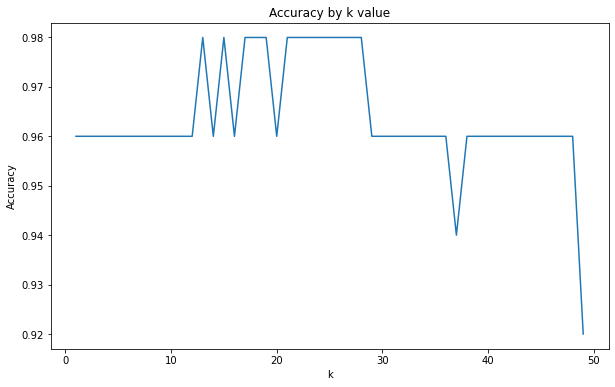

In [18]:
accuracies = []
for k in range(1,50):
    correct, accuracy = get_test_set_predictions(k)
    accuracies.append(accuracy)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50), accuracies)
plt.title('Accuracy by k value')
plt.xlabel('k')
plt.ylabel('Accuracy')